In [1]:
import sys, os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import mplstereonet
from scipy.stats import wishart

sys.path.append("G:\My Drive\Documents\PhD\Analysis\libs")
import pycompass
from pycompass.SNE import pdf

Sampled 2000 points in 5376 iterations. On average 2.0 iterations were needed per sample.
Sampled 2000 points in 5479 iterations. On average 2.0 iterations were needed per sample.
Sampled 2000 points in 5390 iterations. On average 2.0 iterations were needed per sample.
Sampled 2000 points in 5439 iterations. On average 2.0 iterations were needed per sample.


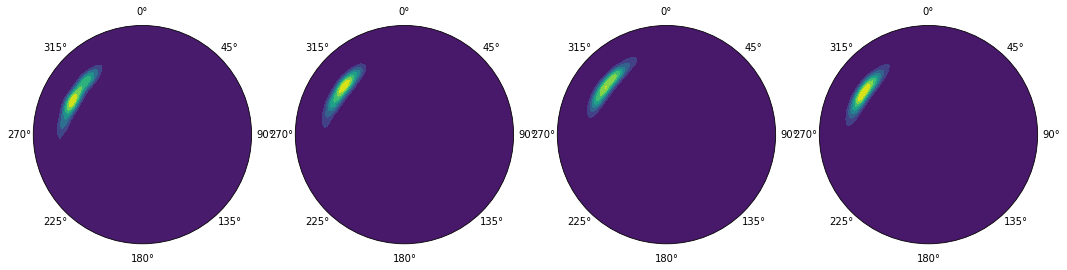

In [15]:
#################################################
#TEST 1 - CHECK FOR CONVERGENCE AND CONSISTENCY
#################################################
phi = np.deg2rad(305)
theta = np.deg2rad(30)
alpha = np.deg2rad(0)
e1 = 2.0
e2 = 0.1
e3 = 0.025
n = 10

P = pdf.constructCOV(phi,theta,alpha,e1,e2,e3) #build

#do sampling
trials=4
fig, ax = mplstereonet.subplots(1,trials,figsize=(18,6))
samples = []
for i in range(trials):
    #sample
    samples.append(pdf.samplePosteriorMCMC(P,n,None,2000))
    
#plot steonets
for i in range(trials):
    plunge = np.rad2deg(samples[i][:,1])
    bearing = np.rad2deg(samples[i][:,0])
        
    #plot stereonet
    cax = ax[i].density_contourf(plunge, bearing, measurement='lines')
plt.show()

Sampled 2000 points in 5716 iterations. On average 2.0 iterations were needed per sample.
Sampled 2000 points in 5671 iterations. On average 2.0 iterations were needed per sample.
Sampled 2000 points in 5512 iterations. On average 2.0 iterations were needed per sample.
Sampled 2000 points in 5624 iterations. On average 2.0 iterations were needed per sample.


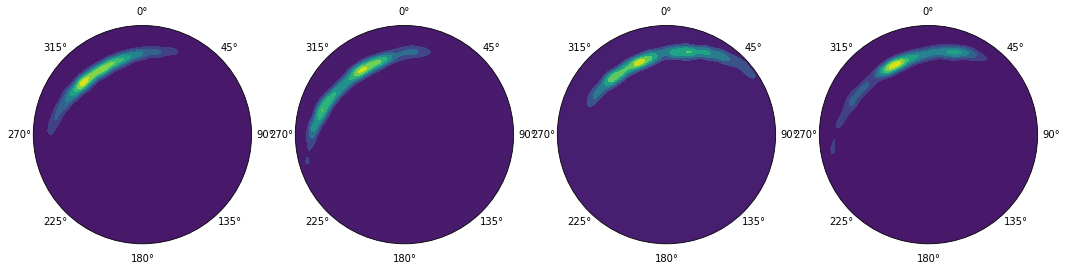

In [14]:
phi = np.deg2rad(330)
theta = np.deg2rad(30)
alpha = np.deg2rad(0)
e1 = 5.0
e2 = 0.5
e3 = 0.4
n = 50

P = pdf.constructCOV(phi,theta,alpha,e1,e2,e3) #build

#do sampling
trials=4
fig, ax = mplstereonet.subplots(1,trials,figsize=(18,6))
samples = []
for i in range(trials):
    #sample
    samples.append(pdf.samplePosteriorMCMC(P,n,None,2000))
    
#plot steonets
for i in range(trials):
    plunge = np.rad2deg(samples[i][:,1])
    bearing = np.rad2deg(samples[i][:,0])
        
    #plot stereonet
    cax = ax[i].density_contourf(plunge, bearing, measurement='lines')
plt.show()

Sampled 2000 points in 4080 iterations. On average 2.0 iterations were needed per sample.
Sampled 2000 points in 8193 iterations. On average 4.0 iterations were needed per sample.
Sampled 2000 points in 17731 iterations. On average 8.0 iterations were needed per sample.
Sampled 2000 points in 32552 iterations. On average 16.0 iterations were needed per sample.


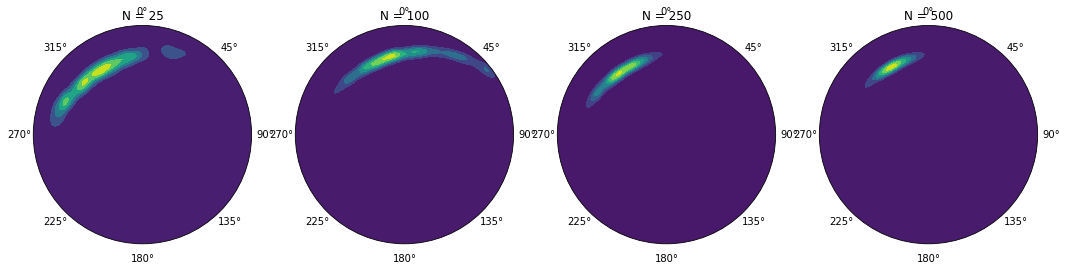

In [19]:
############################################
#TEST 3 - EXPLORE EFFECT OF CHANGING N
############################################
phi = np.deg2rad(330)
theta = np.deg2rad(30)
alpha = np.deg2rad(0)
e1 = 5.0
e2 = 0.5
e3 = 0.4
n = 50

P = pdf.constructCOV(phi,theta,alpha,e1,e2,e3) #build

fig, ax = mplstereonet.subplots(1,4,figsize=(18,6))
for i,n in enumerate([25,100,250,500]):
    S = pdf.samplePosteriorMCMC(P,n,None,2000)
    
    plunge = np.rad2deg(S[:,1])
    bearing = np.rad2deg(S[:,0])
    cbar = ax[i].density_contourf(plunge, bearing, measurement='lines')
    ax[i].set_title("N = %d" % n)
plt.show()

Proposal-width = 0.010
13.5 ms ± 600 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Sampled 2000 points in 2251 iterations. On average 1.0 iterations were needed per sample.
Proposal-width = 0.025
13 ms ± 524 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Sampled 2000 points in 2767 iterations. On average 1.0 iterations were needed per sample.
Proposal-width = 0.050
13.5 ms ± 343 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Sampled 2000 points in 3916 iterations. On average 1.0 iterations were needed per sample.
Proposal-width = 0.100
14.6 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Sampled 2000 points in 7869 iterations. On average 3.0 iterations were needed per sample.


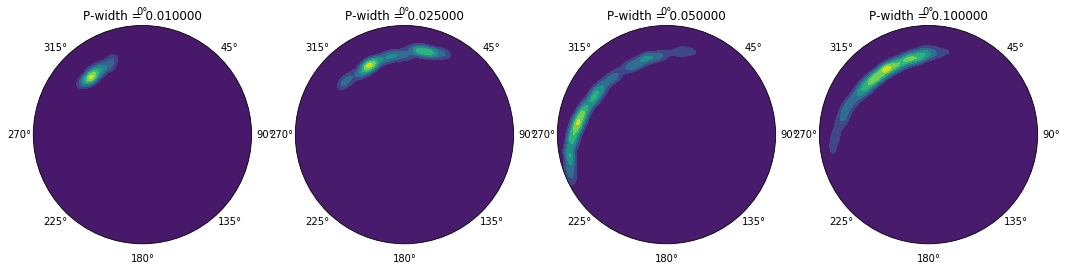

In [20]:
###################################################################
#LOOK AT EFFECT OF PROPOSAL WIDTH ON SAMPLING TIME AND RESULTS
###################################################################
fig, ax = mplstereonet.subplots(1,4,figsize=(18,6))
for i,pwidth in enumerate([0.01,0.025,0.05,0.1]):
    print ("Proposal-width = %.3f" % pwidth)
    %timeit pdf.samplePosteriorMCMC(P,50,None,2000,proposalWidth=pwidth,verbose=False)
    
    S = pdf.samplePosteriorMCMC(P,50,None,2000,proposalWidth=pwidth)
    
    plunge = np.rad2deg(S[:,1])
    bearing = np.rad2deg(S[:,0])
    cbar = ax[i].density_contourf(plunge, bearing, measurement='lines')
    ax[i].set_title("P-width = %f" % pwidth)
plt.show()